In [33]:
import pandas as pd
import numpy as np
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from baseline01  import Baseline01
from baseline02  import Baseline02SMA
from baseline02  import Baseline02EWMA
from IPython.display import display

In [34]:
#### EURUSD 2009-2014 dataset

In [35]:
# load  dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'
year=20092014
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

In [36]:
model = Baseline01(lookahead=1)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False);

EURUSD 20092014: f1-score: 0.484, mean future return: -0.013 bps, (-0.013 bps), annualized future return -0.379 (-0.377)


In [39]:
best = None
best_w = None
for w in range(10,1010,10):
    model = Baseline02SMA(lookahead=1, window=w)
    Y_test_pred = model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
  
    if best is None or m['f1_score'] > best['f1_score']:
        best = m['f1_score']
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02SMA(lookahead=1, window=best_w)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);


IndexError: invalid index to scalar variable.

('Best centre-of-mass: ', 1000)
EURUSD 20092014: f1-score: 0.440, mean future return: -0.003 bps, (-0.003 bps), annualized future return -0.109 (-0.109)


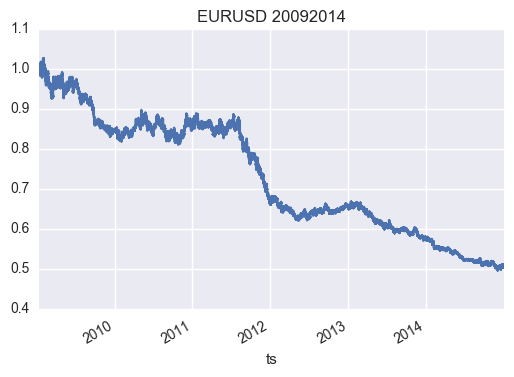

In [10]:
best = None
best_w = None
for w in range(10,1010,10):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    if best is None or m['f1_score'] > best['f1_score']:
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02EWMA(lookahead=1, centre_of_mass=best_w)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);


---------------

#### Idea - inverted signal

Models all give negative results, suggesting that over short timescales price change is mean-reverting. 
Let's try invert the signal, and tune for best performance

EURUSD 20092014: f1-score: 0.513, mean future return: 0.012 bps, (0.012 bps), annualized future return 0.572 (0.575)


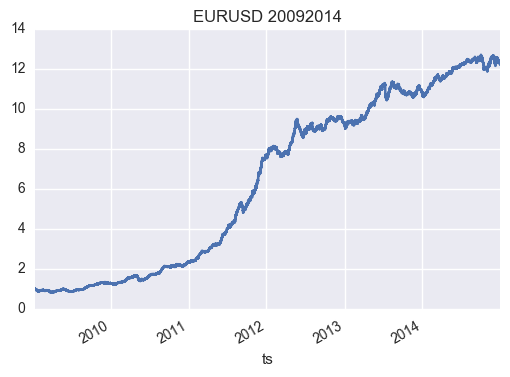

In [11]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True);

(1000, 0.54269448699877432)
(1500, 0.54787050985715491)
(2000, 0.55158005764337081)
(3000, 0.55564949240168593)
(3500, 0.55638554517739025)
(3600, 0.55655462000878819)
(3700, 0.55639801876818284)
(3800, 0.55625142107725623)
(3900, 0.55633751755046101)
(4000, 0.5562213709758852)
(4100, 0.55629574724088504)
(5000, 0.55307654324375899)
(6000, 0.54863728770254938)
(7000, 0.54564720656016752)
(8000, 0.54339683497875324)
(9000, 0.54283212591901442)
(10000, 0.54154169146294484)
('Best w is', 10000)


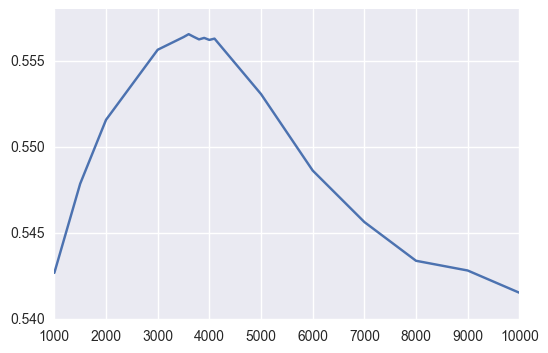

In [32]:
ws = []
f1s = []
best = None
best_w = None
for w in [1000, 1500, 2000, 3000, 3500, 3600,3700,3800,3900, 4000, 4100, 5000, 6000, 7000,8000,9000,10000]:
#for w in [0,1,2,5,10,100,200,300,400,500,600,700,800,900,1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000]:
    model = Baseline02SMA(lookahead=1, window=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    ws.append(w)
    f1s.append(m['f1_score'])
    print (w, m['f1_score'])
  
    if best is None or m['f1_score'] > best['f1_score']:
        best_w = w
plt.plot(ws, f1s)
print("Best w is", w)

('Best centre-of-mass: ', 1000)
EURUSD 20092014: f1-score: 0.543, mean future return: 0.003 bps, (0.003 bps), annualized future return 0.108 (0.108)


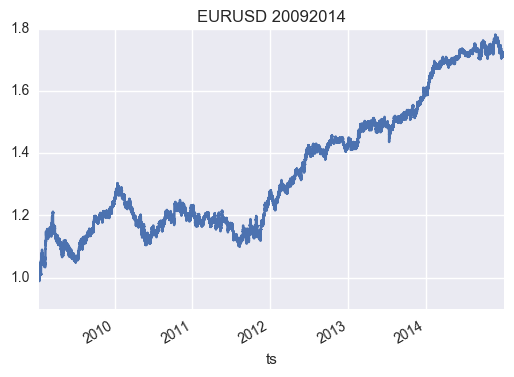

In [12]:
print("Best centre-of-mass: ", best_w)
model = Baseline02SMA(lookahead=1, window=best_w)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);

EURUSD 20092014: f1-score: 0.541, mean future return: 0.002 bps, (0.002 bps), annualized future return 0.058 (0.058)


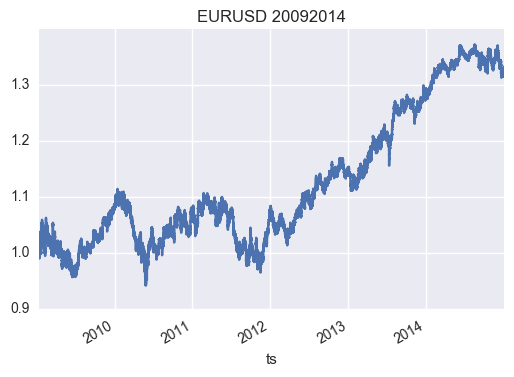

In [19]:
model = Baseline02SMA(lookahead=1, window=w)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);


('Best centre-of-mass: ', 1000)
EURUSD 20092014: f1-score: 0.560, mean future return: 0.003 bps, (0.003 bps), annualized future return 0.123 (0.123)


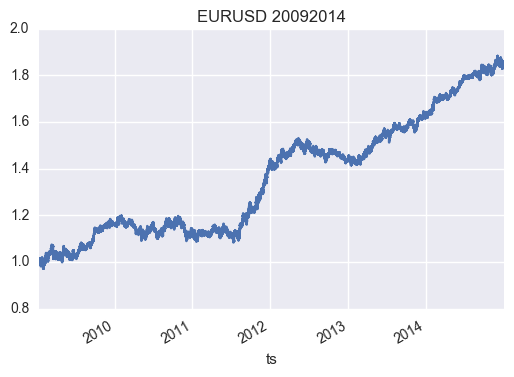

In [13]:
best = None
best_w = None
for w in range(10,1010,10):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    if best is None or m['f1_score'] > best['f1_score']:
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02EWMA(lookahead=1, centre_of_mass=best_w)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);
